In [29]:
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import date
import seaborn as sns

In [30]:
reg_data = pd.read_csv('C:/Users/Владислав/Data science/github/Data/problem1-reg_data.csv', sep=';')
reg_data.head(3)

,reg_ts,uid
0,911382223,1
1,932683089,2
2,947802447,3


In [31]:
auth_data = pd.read_csv('C:/Users/Владислав/Data science/github/Data/problem1-auth_data.csv', sep=';')
auth_data.head(3)

,auth_ts,uid
0,911382223,1
1,932683089,2
2,932921206,2


In [32]:
auth_data.shape

(9601013, 2)

In [33]:
reg_data.isnull().sum()

reg_ts    0
uid       0
dtype: int64

In [34]:
auth_data.isnull().sum()

auth_ts    0
uid        0
dtype: int64

In [35]:
reg_data.duplicated().sum()

0

In [36]:
auth_data.duplicated().sum()

0

In [37]:
reg_data

,reg_ts,uid
0,911382223,1
1,932683089,2
2,947802447,3
3,959523541,4
4,969103313,5
...,...,...
999995,1600874034,1110618
999996,1600874086,1110619
999997,1600874139,1110620
999998,1600874191,1110621


In [39]:
reg_data['reg_date'] = reg_data.reg_ts.apply(lambda x: datetime.fromtimestamp(x)).dt.date
auth_data['auth_date'] = auth_data.auth_ts.apply(lambda x: datetime.fromtimestamp(x)).dt.date

In [43]:
reg_data.duplicated().sum()

0

<AxesSubplot:xlabel='reg_date'>

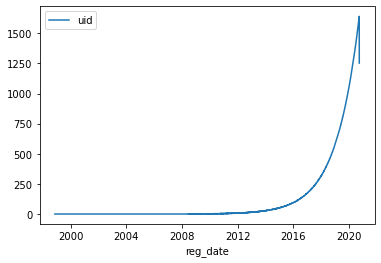

In [47]:
reg_data.groupby('reg_date').agg({'uid' : 'count'}).plot()

In [48]:
reg_data

,reg_ts,uid,reg_date
0,911382223,1,1998-11-18
1,932683089,2,1999-07-23
2,947802447,3,2000-01-14
3,959523541,4,2000-05-28
4,969103313,5,2000-09-16
...,...,...,...
999995,1600874034,1110618,2020-09-23
999996,1600874086,1110619,2020-09-23
999997,1600874139,1110620,2020-09-23
999998,1600874191,1110621,2020-09-23


In [51]:
# 
(auth_data.groupby(['uid', 'auth_date']).auth_ts.count() > 1).sum()

0

<AxesSubplot:xlabel='auth_date'>

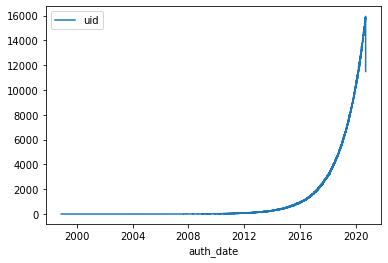

In [57]:
auth_data.groupby('auth_date').agg({'uid' : 'count'}).plot()

In [59]:
auth_data.groupby('auth_date').agg({'uid' : 'count'}).idxmax()

uid    2020-09-21
dtype: object

In [61]:
auth_data.auth_date.max()

datetime.date(2020, 9, 23)

In [76]:
auth_data.query('(auth_date >= "2020-09-15") and (auth_date <= "2020-09-30")').groupby('auth_date').uid.count()

auth_date
2020-09-15    15487
2020-09-16    15577
2020-09-17    15808
2020-09-18    15709
2020-09-19    15716
2020-09-20    15816
2020-09-21    15943
2020-09-22    15782
2020-09-23    11496
Name: uid, dtype: int64

In [10]:
def calculate_RR(reg_data, auth_data, start_interval='1998-11-18', end_interval=str(date.today())):
    start_interval = datetime.strptime(start_interval, '%Y-%m-%d')
    end_interval = datetime.strptime(end_interval, '%Y-%m-%d')
    
    reg_data['reg_date'] = reg_data.reg_ts.apply(lambda x: datetime.fromtimestamp(x)).dt.date
    auth_data['auth_date'] = auth_data.auth_ts.apply(lambda x: datetime.fromtimestamp(x)).dt.date
    
    reg_data.reg_date = pd.to_datetime(reg_data.reg_date)
    auth_data.auth_date = pd.to_datetime(auth_data.auth_date)
    
    reg_data = reg_data[(reg_data.reg_date >= start_interval) & (reg_data.reg_date <= end_interval)]
    
    all_data = reg_data.merge(auth_data, on='uid', how='left')
    all_data['life_time'] = (all_data.auth_date-all_data.reg_date).dt.days
    
    pre_ret = all_data.groupby(['reg_date', 'life_time'], as_index=0).agg({'uid' : 'nunique'}). \
        rename(columns={'uid' : 'retention'}).merge(reg_data.groupby('reg_date').agg({'uid': 'count'}), on='reg_date')
    
    pre_ret['RR'] = pre_ret.retention / pre_ret.uid
    pre_ret = pre_ret.query('life_time < 31')
    RR_table = pre_ret.pivot(index='reg_date', columns='life_time', values='RR')
    return RR_table

In [70]:
result = calculate_RR(reg_data, auth_data, start_interval='2020-09-10', end_interval='2020-09-23')

In [71]:
result

life_time,0,1,2,3,4,5,6,7,8,9,10,11,12,13
reg_date,,,,,,,,,,,,,,
2020-09-10,1.0,0.018024,0.044127,0.045991,0.043505,0.069608,0.057800,0.068365,0.049720,0.041019,0.060907,0.047856,0.052206,0.036669
2020-09-11,1.0,0.014277,0.039727,0.039106,0.061453,0.063315,0.068901,0.062694,0.049038,0.039106,0.055866,0.061453,0.039106,NaN
2020-09-12,1.0,0.017968,0.040892,0.039653,0.040273,0.063197,0.068773,0.057621,0.046468,0.051425,0.052045,0.029740,NaN,NaN
2020-09-13,1.0,0.022263,0.044527,0.039579,0.050093,0.061843,0.066172,0.051948,0.048237,0.050093,0.044527,NaN,NaN,NaN
2020-09-14,1.0,0.019753,0.038889,0.042593,0.058025,0.062963,0.068519,0.068519,0.044444,0.033951,NaN,NaN,NaN,NaN
2020-09-15,1.0,0.022811,0.040074,0.045006,0.060419,0.057337,0.069667,0.053637,0.028360,NaN,NaN,NaN,NaN,NaN
2020-09-16,1.0,0.020923,0.041231,0.044308,0.049846,0.060923,0.076923,0.040000,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-17,1.0,0.016595,0.041180,0.043639,0.059004,0.062077,0.055317,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-18,1.0,0.021472,0.042331,0.045399,0.046626,0.044785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
test = result.reset_index().query('reg_date == "2020-09-15"').set_index('reg_date')

<AxesSubplot:xlabel='reg_date,life_time'>

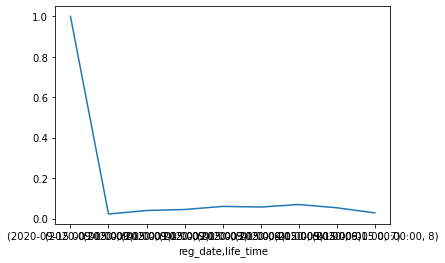

In [69]:
test.stack().plot()